Epoch: 10 | Loss: 2.843639373779297
Epoch: 20 | Loss: 2.8336002826690674
Epoch: 30 | Loss: 2.8348448276519775
Epoch: 40 | Loss: 2.8327720165252686
Epoch: 50 | Loss: 2.826172351837158
Epoch: 60 | Loss: 2.840148448944092
Epoch: 70 | Loss: 2.8341476917266846
Epoch: 80 | Loss: 2.8293843269348145
Epoch: 90 | Loss: 2.825529098510742
Epoch: 100 | Loss: 2.8447623252868652


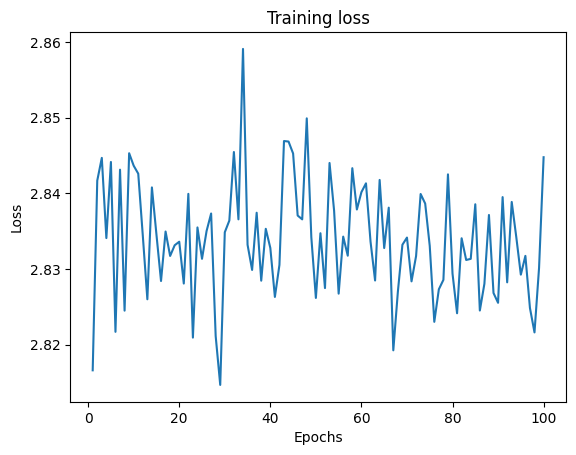

Accuracy: 0.058823529411764705


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
class RBFN(nn.Module):
    def __init__(self, input_size, num_classes, num_centers):
        super(RBFN, self).__init__()
        self.centers = nn.Parameter(torch.randn(num_centers, input_size))
        self.beta = nn.Parameter(torch.ones(num_centers))
        self.linear = nn.Linear(num_centers, num_classes)

    def forward(self, x):
        distances = torch.cdist(x, self.centers)  
        sig = torch.std(x)
        activations = torch.exp(-self.beta * distances**2) /(2*(sig**2)) 
        output = self.linear(activations)
        return output
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
dataset = datasets.ImageFolder('/Users/sivaprasanth/Documents/DL/Ex3/flowers/validation', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

model = RBFN(input_size=224*224*3, num_classes=17, num_centers=50)
optimizer = optim.Adam(model.parameters(), lr=0.001)
losses =[]
num_epochs = 100
for epoch in range(num_epochs):
    for images, labels in dataloader:
        # Forward pass
        outputs = model(images.view(-1, 224*224*3))
        loss = nn.CrossEntropyLoss()(outputs, labels)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    losses.append(loss.item())
    # Print training progress
    if (epoch+1) % 10 == 0:
        print("Epoch: {} | Loss: {}".format(epoch+1, loss.item()))
import matplotlib.pyplot as plt
plt.plot(range(1,num_epochs+1),losses)
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader:
        outputs = model(images.view(-1, 224*224*3))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print("Accuracy: {}".format(accuracy))